In [1]:
#from pycaret.datasets import get_data

import pandas as pd
dataset = pd.read_csv("loandatanew.csv")
dataset = dataset.drop(["Loan_ID"], axis =1)

data = dataset.sample(frac=0.75, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (460, 13)
Unseen Data For Predictions: (154, 13)


In [2]:
from pycaret.classification import *

In [7]:
exp_clf102 = setup(data = data, target = 'Loan_Status', session_id=123,
                  normalize = True, 
                  transformation = True, 
                  ignore_low_variance = True,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                  bin_numeric_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Cibil Score'])

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"N: 0, Y: 1"
3,Original Data,"(460, 13)"
4,Missing Values,True
5,Numeric Features,4
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [8]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.7975,0.7436,0.9591,0.7929,0.8671,0.4580,0.5015,2.0166
1,Ridge Classifier,0.7851,0.0000,0.9409,0.7904,0.8576,0.4305,0.4691,0.0125
2,Extreme Gradient Boosting,0.7850,0.7530,0.9273,0.7978,0.8558,0.4410,0.4721,0.0642
3,Logistic Regression,0.7789,0.7345,0.9364,0.7871,0.8540,0.4124,0.4426,0.0232
4,Extra Trees Classifier,0.7757,0.7638,0.9000,0.8009,0.8455,0.4357,0.4574,0.1821
5,Linear Discriminant Analysis,0.7727,0.7405,0.9227,0.7869,0.8480,0.4056,0.4360,0.0100
6,Gradient Boosting Classifier,0.7726,0.7259,0.9136,0.7934,0.8462,0.4133,0.4500,0.0977
7,Random Forest Classifier,0.7695,0.7813,0.8864,0.8014,0.8402,0.4260,0.4405,0.1364
8,Ada Boost Classifier,0.7603,0.7130,0.8955,0.7906,0.8370,0.3858,0.4102,0.0799
9,Light Gradient Boosting Machine,0.7600,0.7372,0.8955,0.7895,0.8367,0.3866,0.4087,0.0486


In [18]:
#cb = create_model('catboost', fold = 5)

In [14]:
#rf = create_model('rf', fold = 5)

In [21]:
cat = create_model('catboost', fold = 5, round = 2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.82,0.73,1.00,0.79,0.88,0.50,0.58
1,0.78,0.76,0.98,0.77,0.86,0.39,0.46
2,0.80,0.75,0.98,0.78,0.87,0.44,0.50
3,0.81,0.71,0.95,0.81,0.88,0.51,0.54
4,0.84,0.74,0.95,0.84,0.89,0.60,0.62
Mean,0.81,0.74,0.97,0.80,0.88,0.49,0.54
SD,0.02,0.02,0.02,0.03,0.01,0.07,0.06


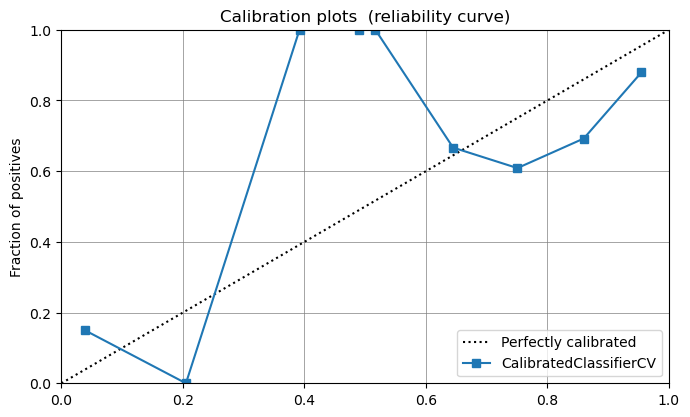

In [63]:
calibrated_cat = calibrate_model(cat)
plot_model(calibrated_cat, plot='calibration')

In [25]:
tuned_cat = tune_model(cat, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7879,0.6570,1.0000,0.7586,0.8627,0.4324,0.5252
1,0.8125,0.8045,1.0000,0.7857,0.8800,0.4783,0.5606
2,0.8438,0.7864,1.0000,0.8148,0.8980,0.5789,0.6383
3,0.7500,0.5864,1.0000,0.7333,0.8462,0.2558,0.3830
4,0.8750,0.9045,1.0000,0.8462,0.9167,0.6735,0.7125
5,0.7188,0.6455,0.9545,0.7241,0.8235,0.1910,0.2458
6,0.8438,0.7091,1.0000,0.8148,0.8980,0.5789,0.6383
7,0.7812,0.8000,0.9545,0.7778,0.8571,0.4105,0.4526
8,0.8125,0.5682,1.0000,0.7857,0.8800,0.4783,0.5606
9,0.8750,0.9409,0.9545,0.8750,0.9130,0.6923,0.7006


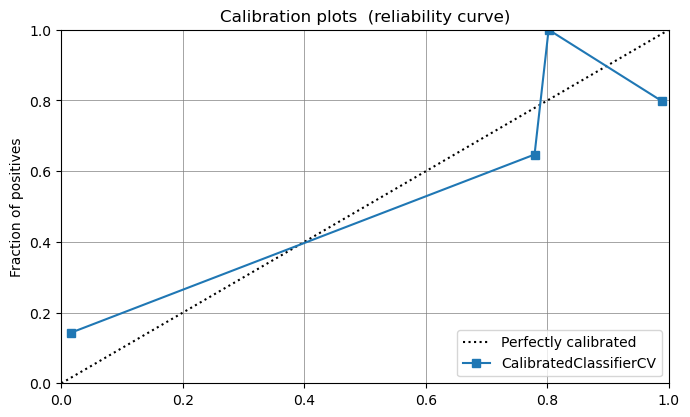

In [64]:
calibrated_tunedcat = calibrate_model(tuned_cat)    
plot_model(calibrated_tunedcat, plot='calibration')   ##well calibrated

In [76]:
calibrated_tunedcat_isotonic = calibrate_model(tuned_cat, method = 'isotonic')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8182,0.6508,1.0000,0.7857,0.8800,0.5263,0.5976
1,0.8438,0.8182,1.0000,0.8148,0.8980,0.5789,0.6383
2,0.7500,0.8045,0.8636,0.7917,0.8261,0.3846,0.3892
3,0.7500,0.6568,0.9545,0.7500,0.8400,0.3043,0.3568
4,0.7812,0.8909,0.8636,0.8261,0.8444,0.4766,0.4780
5,0.7188,0.5864,0.9545,0.7241,0.8235,0.1910,0.2458
6,0.7812,0.7227,0.9091,0.8000,0.8511,0.4455,0.4587
7,0.7500,0.7636,0.9091,0.7692,0.8333,0.3469,0.3671
8,0.8125,0.5727,1.0000,0.7857,0.8800,0.4783,0.5606
9,0.8750,0.9386,0.9545,0.8750,0.9130,0.6923,0.7006


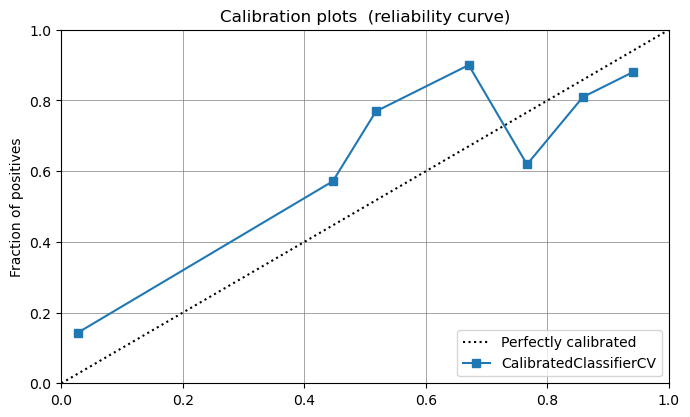

In [77]:
plot_model(calibrated_tunedcat_isotonic, plot='calibration')

In [26]:
rfo = create_model('rf', fold = 5, round = 2)
tuned_rfo = tune_model(rfo, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7879,0.5165,1.0000,0.7586,0.8627,0.4324,0.5252
1,0.8438,0.7818,0.9545,0.8400,0.8936,0.6040,0.6218
2,0.8438,0.8182,1.0000,0.8148,0.8980,0.5789,0.6383
3,0.7500,0.6273,1.0000,0.7333,0.8462,0.2558,0.3830
4,0.8750,0.8864,1.0000,0.8462,0.9167,0.6735,0.7125
5,0.7188,0.6182,0.9545,0.7241,0.8235,0.1910,0.2458
6,0.8438,0.7136,1.0000,0.8148,0.8980,0.5789,0.6383
7,0.7500,0.8273,0.9091,0.7692,0.8333,0.3469,0.3671
8,0.7812,0.6455,0.9545,0.7778,0.8571,0.4105,0.4526
9,0.9062,0.8591,0.9545,0.9130,0.9333,0.7757,0.7779


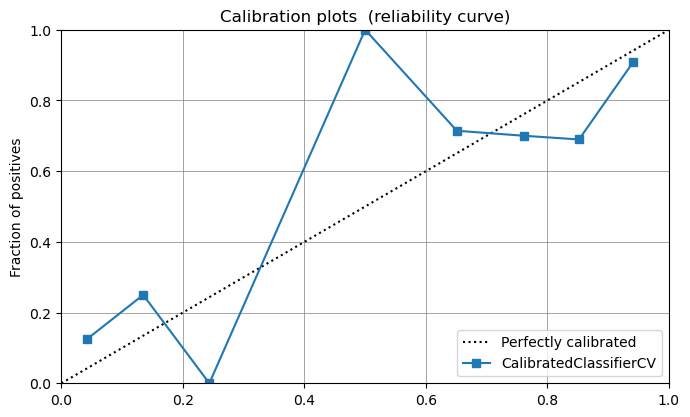

In [65]:
calibrated_tunedrfo = calibrate_model(tuned_rfo)
plot_model(calibrated_tunedrfo, plot='calibration')

In [27]:
#cat #rfo

bagged_rfo = ensemble_model(rfo)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7879,0.7562,1.0000,0.7586,0.8627,0.4324,0.5252
1,0.8125,0.7977,1.0000,0.7857,0.8800,0.4783,0.5606
2,0.8438,0.8136,1.0000,0.8148,0.8980,0.5789,0.6383
3,0.7500,0.5773,1.0000,0.7333,0.8462,0.2558,0.3830
4,0.8750,0.8386,1.0000,0.8462,0.9167,0.6735,0.7125
5,0.7188,0.6909,0.9545,0.7241,0.8235,0.1910,0.2458
6,0.8438,0.6864,1.0000,0.8148,0.8980,0.5789,0.6383
7,0.7812,0.8023,0.9545,0.7778,0.8571,0.4105,0.4526
8,0.8125,0.6159,1.0000,0.7857,0.8800,0.4783,0.5606
9,0.9062,0.9023,0.9545,0.9130,0.9333,0.7757,0.7779


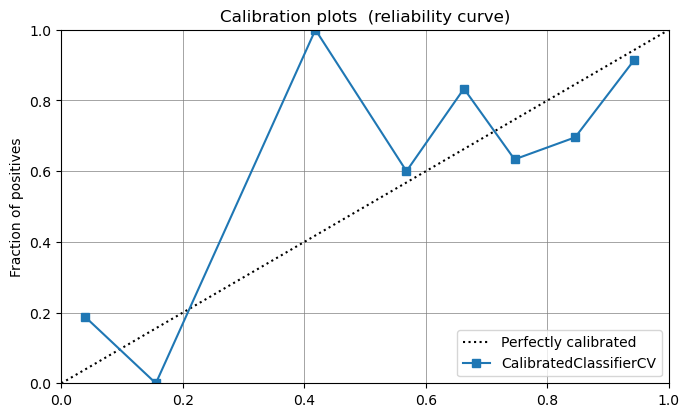

In [66]:
calibrated_bagrfo = calibrate_model(bagged_rfo)
plot_model(calibrated_bagrfo, plot='calibration')

In [28]:
bagged_cat = ensemble_model(cat)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7879,0.7190,1.0000,0.7586,0.8627,0.4324,0.5252
1,0.8438,0.7909,1.0000,0.8148,0.8980,0.5789,0.6383
2,0.8438,0.7818,1.0000,0.8148,0.8980,0.5789,0.6383
3,0.7188,0.6455,0.9545,0.7241,0.8235,0.1910,0.2458
4,0.8750,0.8818,1.0000,0.8462,0.9167,0.6735,0.7125
5,0.7188,0.7227,0.9545,0.7241,0.8235,0.1910,0.2458
6,0.8438,0.6864,1.0000,0.8148,0.8980,0.5789,0.6383
7,0.7812,0.7591,0.9545,0.7778,0.8571,0.4105,0.4526
8,0.8125,0.6136,1.0000,0.7857,0.8800,0.4783,0.5606
9,0.9062,0.8591,0.9545,0.9130,0.9333,0.7757,0.7779


In [67]:
#calibrated_bagcat = calibrate_model(bagged_cat)
#plot_model(calibrated_bagcat, plot='calibration')    ##too much computational ltime

IntProgress(value=0, description='Processing: ', max=14)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:09:39
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Model
ETC,. . . . . . . . . . . . . . . . . .,0.0 Seconds Remaining


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7879,0.719,1.0,0.7586,0.8627,0.4324,0.5252


KeyboardInterrupt: 

In [29]:
print(bagged_rfo)


BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
     

In [30]:
print(bagged_cat)


BaggingClassifier(base_estimator=<catboost.core.CatBoostClassifier object at 0x000001A3DF093308>,
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=-1, oob_score=False,
                  random_state=123, verbose=0, warm_start=False)


In [33]:
boosted_cat = ensemble_model(cat, method = "Boosting")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7879,0.7107,1.0000,0.7586,0.8627,0.4324,0.5252
1,0.6875,0.7409,0.7727,0.7727,0.7727,0.2727,0.2727
2,0.8438,0.7909,0.9545,0.8400,0.8936,0.6040,0.6218
3,0.6562,0.6591,0.8636,0.7037,0.7755,0.0737,0.0812
4,0.8438,0.8318,0.9545,0.8400,0.8936,0.6040,0.6218
5,0.7500,0.7000,0.9545,0.7500,0.8400,0.3043,0.3568
6,0.7812,0.6682,0.9091,0.8000,0.8511,0.4455,0.4587
7,0.6875,0.7500,0.8182,0.7500,0.7826,0.2308,0.2335
8,0.8125,0.6682,1.0000,0.7857,0.8800,0.4783,0.5606
9,0.8438,0.8182,0.8636,0.9048,0.8837,0.6460,0.6476


In [68]:
#calibrated_boostedcat = calibrate_model(boosted_cat)
#plot_model(calibrated_boostedcat, plot='calibration') ##too long in duration

IntProgress(value=0, description='Processing: ', max=14)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:09:39
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Model
ETC,. . . . . . . . . . . . . . . . . .,0.0 Seconds Remaining


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7879,0.7273,1.0,0.7586,0.8627,0.4324,0.5252


KeyboardInterrupt: 

In [32]:
boosted_rfo = ensemble_model(rfo, method = "Boosting")   

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8182,0.7438,1.0000,0.7857,0.8800,0.5263,0.5976
1,0.8438,0.8455,1.0000,0.8148,0.8980,0.5789,0.6383
2,0.8125,0.7864,0.9545,0.8077,0.8750,0.5102,0.5398
3,0.6250,0.6455,0.8182,0.6923,0.7500,0.0204,0.0216
4,0.8750,0.7409,1.0000,0.8462,0.9167,0.6735,0.7125
5,0.7188,0.6364,0.9545,0.7241,0.8235,0.1910,0.2458
6,0.8125,0.6682,1.0000,0.7857,0.8800,0.4783,0.5606
7,0.7812,0.7227,0.8636,0.8261,0.8444,0.4766,0.4780
8,0.7500,0.7455,0.9091,0.7692,0.8333,0.3469,0.3671
9,0.8750,0.8500,0.9091,0.9091,0.9091,0.7091,0.7091


In [69]:
#calibrated_boostedrfo = calibrate_model(boosted_rfo)
#plot_model(calibrated_boostedrfo, plot='calibration')

IntProgress(value=0, description='Processing: ', max=14)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:09:39
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Model
ETC,. . . . . . . . . . . . . . . . . .,0.0 Seconds Remaining


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6667,0.7686,1.0,0.6667,0.8000,0.0000,0.0000
1,0.7188,0.8045,1.0,0.7097,0.8302,0.1325,0.2664
2,0.7188,0.7727,1.0,0.7097,0.8302,0.1325,0.2664


KeyboardInterrupt: 

In [36]:
bagged_rfo2 = ensemble_model(rfo, n_estimators=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7879,0.7769,1.0000,0.7586,0.8627,0.4324,0.5252
1,0.8438,0.8182,1.0000,0.8148,0.8980,0.5789,0.6383
2,0.8438,0.7682,1.0000,0.8148,0.8980,0.5789,0.6383
3,0.6875,0.6091,0.9091,0.7143,0.8000,0.1304,0.1529
4,0.8750,0.8182,1.0000,0.8462,0.9167,0.6735,0.7125
5,0.7188,0.7318,0.9545,0.7241,0.8235,0.1910,0.2458
6,0.8438,0.6409,1.0000,0.8148,0.8980,0.5789,0.6383
7,0.7812,0.8091,0.9545,0.7778,0.8571,0.4105,0.4526
8,0.8125,0.6773,1.0000,0.7857,0.8800,0.4783,0.5606
9,0.9062,0.8977,0.9545,0.9130,0.9333,0.7757,0.7779


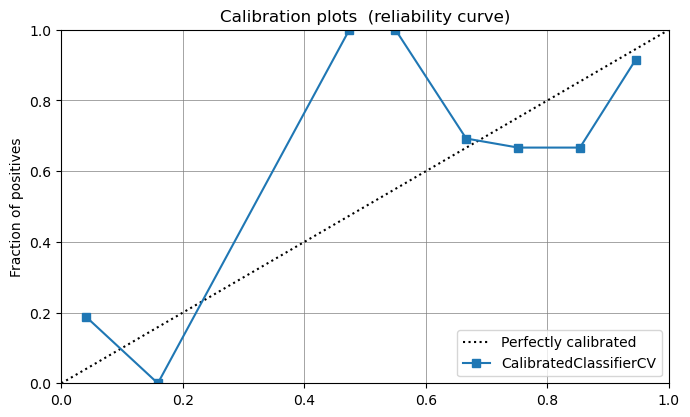

In [70]:
calibrated_bagrfo2 = calibrate_model(bagged_rfo2)
plot_model(calibrated_bagrfo2, plot='calibration')

In [37]:
blend_hard = blend_models()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7576,0.0000,0.9545,0.7500,0.8400,0.3684,0.4183
1,0.7812,0.0000,0.9091,0.8000,0.8511,0.4455,0.4587
2,0.8125,0.0000,0.9545,0.8077,0.8750,0.5102,0.5398
3,0.6875,0.0000,0.9091,0.7143,0.8000,0.1304,0.1529
4,0.8125,0.0000,0.9091,0.8333,0.8696,0.5385,0.5449
5,0.7188,0.0000,0.9545,0.7241,0.8235,0.1910,0.2458
6,0.7812,0.0000,0.9091,0.8000,0.8511,0.4455,0.4587
7,0.7500,0.0000,0.9091,0.7692,0.8333,0.3469,0.3671
8,0.7812,0.0000,0.9545,0.7778,0.8571,0.4105,0.4526
9,0.8750,0.0000,0.9091,0.9091,0.9091,0.7091,0.7091


In [71]:
calibrated_blend_hard = calibrate_model(blend_hard)
plot_model(calibrated_blend_hard, plot='calibration')

IntProgress(value=0, description='Processing: ', max=14)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:09:39
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Model
ETC,. . . . . . . . . . . . . . . . . .,0.0 Seconds Remaining


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


RuntimeError: classifier has no decision_function or predict_proba method.

In [38]:
blend_soft = blend_models(method = 'soft')  

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7576,0.7438,0.9545,0.7500,0.8400,0.3684,0.4183
1,0.7812,0.8318,0.8636,0.8261,0.8444,0.4766,0.4780
2,0.7500,0.8045,0.8636,0.7917,0.8261,0.3846,0.3892
3,0.5938,0.6364,0.7727,0.6800,0.7234,-0.0297,-0.0306
4,0.7812,0.8545,0.8636,0.8261,0.8444,0.4766,0.4780
5,0.7188,0.7227,0.9545,0.7241,0.8235,0.1910,0.2458
6,0.7500,0.6591,0.8636,0.7917,0.8261,0.3846,0.3892
7,0.7812,0.7818,0.9545,0.7778,0.8571,0.4105,0.4526
8,0.7812,0.6909,0.9545,0.7778,0.8571,0.4105,0.4526
9,0.8438,0.8773,0.8636,0.9048,0.8837,0.6460,0.6476


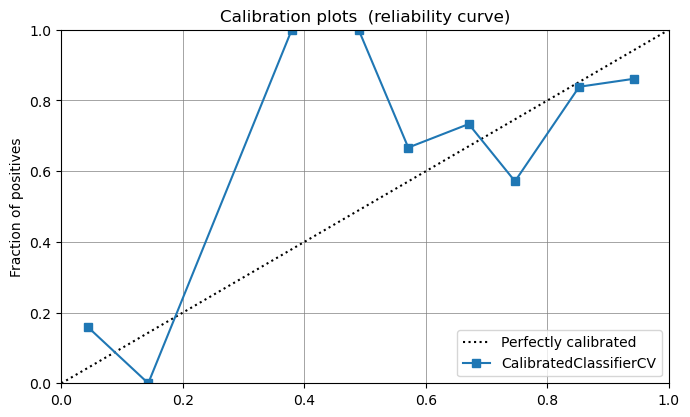

In [72]:
calibrated_blend_soft = calibrate_model(blend_soft)
plot_model(calibrated_blend_soft, plot='calibration')

In [39]:
rfo_bl = create_model('rf', verbose = False)
cat_bl = create_model('catboost', verbose = False)
lightgbm = create_model('lightgbm', verbose = False)
xgboost = create_model('xgboost', verbose = False)

In [42]:
blend_specific_soft = blend_models(estimator_list = [rfo_bl,cat_bl,lightgbm,xgboost], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7879,0.7603,1.0000,0.7586,0.8627,0.4324,0.5252
1,0.8438,0.7682,1.0000,0.8148,0.8980,0.5789,0.6383
2,0.8125,0.8273,0.9545,0.8077,0.8750,0.5102,0.5398
3,0.7188,0.6773,0.9545,0.7241,0.8235,0.1910,0.2458
4,0.8438,0.8364,0.9545,0.8400,0.8936,0.6040,0.6218
5,0.7188,0.7773,0.9545,0.7241,0.8235,0.1910,0.2458
6,0.8438,0.6591,1.0000,0.8148,0.8980,0.5789,0.6383
7,0.7188,0.7773,0.8182,0.7826,0.8000,0.3271,0.3280
8,0.8125,0.7227,1.0000,0.7857,0.8800,0.4783,0.5606
9,0.8750,0.8818,0.9091,0.9091,0.9091,0.7091,0.7091


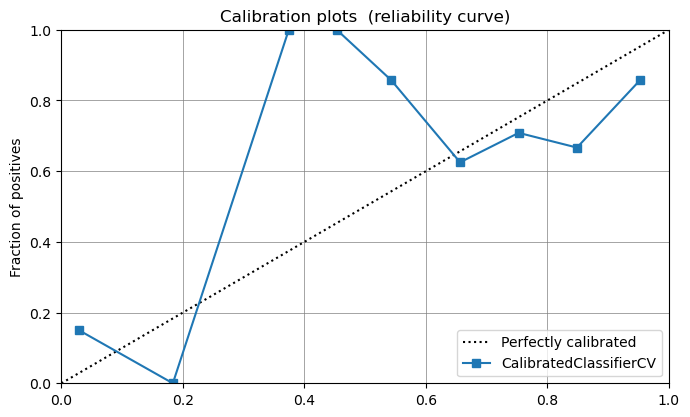

In [73]:
calibrated_blend_specific_soft = calibrate_model(blend_specific_soft)
plot_model(calibrated_blend_specific_soft, plot='calibration')

In [43]:
blend_specific_hard = blend_models(estimator_list = [rfo_bl,cat_bl,lightgbm,xgboost], method = 'hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7879,0.0000,1.0000,0.7586,0.8627,0.4324,0.5252
1,0.8438,0.0000,1.0000,0.8148,0.8980,0.5789,0.6383
2,0.7812,0.0000,0.9091,0.8000,0.8511,0.4455,0.4587
3,0.6562,0.0000,0.8636,0.7037,0.7755,0.0737,0.0812
4,0.7812,0.0000,0.8636,0.8261,0.8444,0.4766,0.4780
5,0.7188,0.0000,0.9545,0.7241,0.8235,0.1910,0.2458
6,0.7812,0.0000,0.9091,0.8000,0.8511,0.4455,0.4587
7,0.6875,0.0000,0.7727,0.7727,0.7727,0.2727,0.2727
8,0.8125,0.0000,1.0000,0.7857,0.8800,0.4783,0.5606
9,0.8438,0.0000,0.8636,0.9048,0.8837,0.6460,0.6476


In [74]:
calibrated_blend_specific_hard = calibrate_model(blend_specific_hard)
plot_model(calibrated_blend_specific_hard, plot='calibration')

IntProgress(value=0, description='Processing: ', max=14)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:09:39
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Model
ETC,. . . . . . . . . . . . . . . . . .,0.0 Seconds Remaining


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


RuntimeError: classifier has no decision_function or predict_proba method.

In [44]:
stack_soft = stack_models([rfo_bl,cat_bl,lightgbm,xgboost])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7576,0.6240,0.9545,0.7500,0.8400,0.3684,0.4183
1,0.7812,0.7409,0.9091,0.8000,0.8511,0.4455,0.4587
2,0.8125,0.8500,0.9545,0.8077,0.8750,0.5102,0.5398
3,0.7500,0.6409,1.0000,0.7333,0.8462,0.2558,0.3830
4,0.8438,0.8455,0.9545,0.8400,0.8936,0.6040,0.6218
5,0.7500,0.6818,0.9545,0.7500,0.8400,0.3043,0.3568
6,0.8125,0.6773,0.9545,0.8077,0.8750,0.5102,0.5398
7,0.7500,0.7636,0.9091,0.7692,0.8333,0.3469,0.3671
8,0.7812,0.6773,0.9545,0.7778,0.8571,0.4105,0.4526
9,0.8750,0.9000,0.9545,0.8750,0.9130,0.6923,0.7006


In [75]:
calibrated_stack_soft = calibrate_model(stack_soft)
plot_model(calibrate_stack_soft, plot='calibration')

IntProgress(value=0, description='Processing: ', max=14)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:09:39
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Model
ETC,. . . . . . . . . . . . . . . . . .,0.0 Seconds Remaining


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7576,0.624,0.9545,0.75,0.84,0.3684,0.4183


KeyboardInterrupt: 

In [62]:
print(blend_soft)

VotingClassifier(estimators=[('Logistic Regression_0',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=123,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('K Neighbors Classifier_1',
                              KNeighborsClassifier(algorithm='aut...
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
      

# Best Model

In [79]:
print(calibrated_tunedcat_isotonic)

CalibratedClassifierCV(base_estimator=<catboost.core.CatBoostClassifier object at 0x000001A3DF038088>,
                       cv=10, method='isotonic')


In [80]:
predict_model(calibrated_tunedcat_isotonic)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Calibrated Classifier C V,0.7914,0.7416,0.9263,0.8,0.8585,0.4693,0.488


,Gender_Female,Gender_Male,Married_No,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Dependents_not_available,Education_Graduate,Self_Employed_No,...,Cibil Score_3.0,Cibil Score_4.0,Cibil Score_5.0,Cibil Score_6.0,Cibil Score_7.0,Cibil Score_8.0,Cibil Score_9.0,Loan_Status,Label,Score
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Y,Y,0.8737
1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,N,0.0511
2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Y,Y,0.8933
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,N,0.0496
4,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Y,Y,0.8073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,N,Y,0.8724
135,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Y,Y,0.8733
136,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Y,Y,0.8925
137,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Y,Y,0.8203


In [81]:
final_model = finalize_model(calibrated_tunedcat_isotonic)

In [82]:
unseen_predictions = predict_model(final_model, data=data_unseen)
unseen_predictions.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Cibil Score,Property_Area,Loan_Status,Label,Score
0,Male,Yes,0,Graduate,No,2132,1591.0,96.0,360.0,1.0,733,Semiurban,Y,Y,0.9150
1,Male,Yes,0,Graduate,No,2425,2340.0,143.0,360.0,1.0,765,Semiurban,Y,Y,0.9800
2,Male,No,2,Graduate,No,4354,0.0,136.0,360.0,1.0,721,Rural,Y,Y,0.7656
3,Male,Yes,3+,Not Graduate,No,3850,983.0,100.0,360.0,1.0,701,Semiurban,Y,Y,0.9303
4,Male,Yes,3+,Graduate,No,5167,3167.0,200.0,360.0,1.0,855,Semiurban,Y,Y,0.9152


In [88]:
save_model(final_model, 'catboost_caliberated')

Transformation Pipeline and Model Succesfully Saved


In [103]:
evaluate_model(final_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [94]:
final_model

CalibratedClassifierCV(base_estimator=<catboost.core.CatBoostClassifier object at 0x000001A3F7EA5388>,
                       cv=10, method='isotonic')

In [102]:
evaluate_model(calibrated_tunedcat_isotonic)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [99]:
calibrate_final = calibrate_model(final_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7879,0.6612,1.0000,0.7586,0.8627,0.4324,0.5252
1,0.8125,0.8227,1.0000,0.7857,0.8800,0.4783,0.5606
2,0.8125,0.8000,0.9545,0.8077,0.8750,0.5102,0.5398
3,0.7500,0.6091,1.0000,0.7333,0.8462,0.2558,0.3830
4,0.8750,0.8909,1.0000,0.8462,0.9167,0.6735,0.7125
5,0.7188,0.6818,0.9545,0.7241,0.8235,0.1910,0.2458
6,0.8438,0.7045,1.0000,0.8148,0.8980,0.5789,0.6383
7,0.7500,0.7909,0.9091,0.7692,0.8333,0.3469,0.3671
8,0.8125,0.5727,1.0000,0.7857,0.8800,0.4783,0.5606
9,0.8750,0.9318,0.9545,0.8750,0.9130,0.6923,0.7006


In [101]:
evaluate_model(calibrate_final)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…